<a href="https://colab.research.google.com/github/MarcelDeSutter/Data_Science_GER/blob/main/0703_loesungen_dimensionsreduzierung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Im Theorie-Notebook haben wir den PCA-Algorithmus kennengelernt. Hier eine kurze Zusammenfassung als Erinnerung:

1. Berechne den Mittelwert $\bar{x}:=\frac{1}{N}\sum_{n=1}^{N}x_n$.
2. Berechne die zentrierte Datenmatrix $\tilde{X}:=(x_1-\bar{x},\ldots,x_n-\bar{x})^T$.
3. Berechne die Kovarianzmatrix $S=\frac{1}{N-1}\tilde{X}^T\tilde{X}$.
4. Berechne die Eigendekomposition der Kovarianzmatrix $S=Q diag(\lambda) Q^T$.
5. Wähle $k$ Spalten von $Q$, die mit den $k$ größten Eigenwerten in $\lambda$ korrespondieren, normalisiere sie und erzeuge daraus die Enkodierungsmatrix $V$.

Nun können wir für eine beliebige Observation $x$ den Rekonstruktionsfehler bezüglich der Projektion $V$ berechnen:

1. Projiziere die Observationen in den latenten Raum $z=V^Tx$.
2. Erhalte die Rekonstruktion, indem der latente Punkt zurück in den Datenraum projiziert wird $\hat{x}=Vz$.

Der Rekonsturktionsfehler $e$ ist nun der MSE zwischen den Daten $X$ und der Rekonstruktion $\hat{X}$:

$$e=\frac{1}{N}\sum_{n=1}^{N}\Vert x_n-\hat{x}_n\Vert_{2}^{2}$$

In [1]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [14]:
X = lfw_people.data
X.shape # 50*37 = 1850

(1288, 1850)

In [15]:
dim = (50, 37)

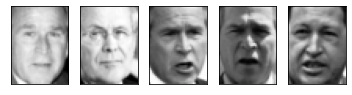

In [11]:
import numpy as np
import matplotlib.pyplot as plt

n_images = 5

fig = plt.figure()
for i in range(n_images):
    idx = np.random.randint(len(X))
    ax = fig.add_subplot(1, n_images, i+1)
    ax.imshow(X[idx].reshape(dim), cmap='Greys_r')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [13]:
S = np.cov(X, rowvar=False)
S.shape

(1850, 1850)